In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from tensorflow.python.lib.io import file_io
from skimage.transform import resize
from keras.models import load_model

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Model used
train_model =  "Inception" # (Inception-v3, Inception-ResNet-v2): Inception,  (ResNet-50): ResNet

# Size of the images
if train_model == "Inception":
	img_width, img_height =	139, 139
elif train_model == "ResNet":
	img_width, img_height =	197, 197

# Test data
test_data_dir = "drive/My Drive/Colab Notebooks/fer2013_train.csv"

# Reinstantiate the fine-tuned model (Also compiling the model using the saved training configuration (unless the model was never compiled))
model = load_model("drive/My Drive/Colab Notebooks/Inception-v3.h5")

batch_size = 1


Using TensorFlow backend.
W1105 14:43:48.206434 140372222445440 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1105 14:43:48.251061 140372222445440 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1105 14:43:48.288265 140372222445440 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1105 14:43:48.289814 140372222445440 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1105 14:43:48.291346 140

In [3]:
def preprocess_input(x):
	if train_model == "Inception":
		x /= 127.5
		x -= 1.
		return x
	elif train_model == "ResNet":
		x -= 128.8006	# np.mean(train_dataset)
		x /= 64.6497	# np.std(train_dataset)
	return x

def get_data(dataset):

	file_stream = file_io.FileIO(test_data_dir, mode="r")
	data = pd.read_csv(file_stream)
	pixels = data["pixels"].tolist()
	images = np.empty((len(data), img_height, img_width, 3))
	i = 0
	
	for pixel_sequence in pixels:
	    single_image = [float(pixel) for pixel in pixel_sequence.split(" ")]	# Extraction of each image
	    single_image = np.asarray(single_image).reshape(48, 48)					# Dimension: 48x48
	    single_image = resize(single_image, (img_height, img_width), order = 3, mode = "constant") # Bicubic
	    ret = np.empty((img_height, img_width, 3))  
	    ret[:, :, 0] = single_image
	    ret[:, :, 1] = single_image
	    ret[:, :, 2] = single_image
	    images[i, :, :, :] = ret
	    i += 1
	
	images = preprocess_input(images)
	labels = data["emotion"].tolist()

	return images, labels					

images, labels = get_data(test_data_dir)

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
# Generates output predictions for the input samples
	# x: 			The input data, as a Numpy array
	# batch_size: 	Integer. If unspecified, it will default to 32
# Returns a numpy array of predictions
predictions = model.predict(
	images,
	batch_size	= batch_size)

predicted_classes	= np.argmax(predictions, axis = 1)		# Returns the class (position of the row) of maximum prediction
true_classes 		=  labels 								# Returns the correct classes associated with the predictions
class_names 		= list(["Anger", "Disgust", "Fear", "Happinness", "Sadness", "Surprise", "Neutral"])	# Returns the names of the classes

# Accuracy classification score. In multilabel classification, this function computes subset accuracy: 
# the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true
	# true_classes:			Ground truth (correct) labels
	# predicted_classes:	Predicted labels, as returned by a classifier
	# normalize:			If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly
	#		 				classified samples (default = True)
# If normalize == True, returns the correctly classified samples (float), else it returns the number of correctly classified samples (int).
accuracy = accuracy_score(
	true_classes, 
	predicted_classes, 
	normalize = True)

INCEPTION

In [5]:
# Build a text report showing the main classification metrics
	# true_classes:			Ground truth (correct) target values
	# predicted_classes:	Estimated targets as returned by a classifier
	# target_names:			Optional display names matching the labels (same order)
# Returns text summary of the precision, recall and F1 score for each class
report = classification_report(
	true_classes, 
	predicted_classes,
	target_names = class_names)

# Print the result of the evaluation
print("Accuracy:")
print(accuracy)
print("\n")
print("Report:")
print(report)
print("\n")

Accuracy:
0.7925737573583197


Report:
              precision    recall  f1-score   support

       Anger       0.73      0.73      0.73      3995
     Disgust       0.87      0.50      0.64       436
        Fear       0.76      0.60      0.67      4097
  Happinness       0.92      0.95      0.94      7215
     Sadness       0.70      0.71      0.70      4830
    Surprise       0.89      0.88      0.88      3171
     Neutral       0.71      0.82      0.76      4965

   micro avg       0.79      0.79      0.79     28709
   macro avg       0.80      0.74      0.76     28709
weighted avg       0.79      0.79      0.79     28709





In [6]:
print("Confusion Matrix")
cm = confusion_matrix(true_classes, predicted_classes)
cm

Confusion Matrix


array([[2926,   12,  201,  111,  348,   34,  363],
       [ 104,  220,   30,   13,   54,    6,    9],
       [ 360,    7, 2465,   85,  617,  234,  329],
       [  65,    1,   20, 6858,   58,   36,  177],
       [ 315,    9,  287,   96, 3413,   16,  694],
       [  51,    4,  167,   66,   23, 2797,   63],
       [ 169,    1,   84,  210,  393,   33, 4075]])

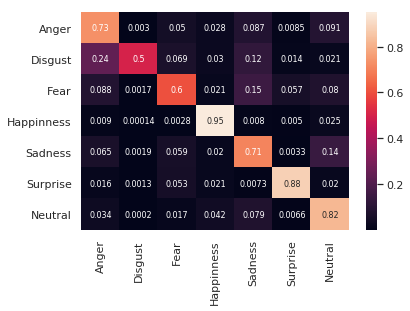

In [7]:
import seaborn as sn
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, class_names,class_names)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 8})# font size

plt.show()

In [0]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [9]:
from sklearn.preprocessing import LabelBinarizer
auc_sc=multiclass_roc_auc_score(true_classes, predicted_classes, average="macro")
auc_sc

0.8535589165414359